# <font color='red'>Lab 01 - Benford's Law</font>

### EARTH 468: Data Analysis & Model Estimation

#### Lab developed by E.A. Hetland

#### Due: Beginning of the lab period on the week of Sept. 21, 2021 (in two weeks).

**For full credit:** 
Be sure to include your name with your notebook either as a markdown cell or in the file name. 

Write any necessary code in code cells below the description of each question. Write any discussion answers in markdown cells below the code cells, not as comments in your code. Be explicit about what you are answering and write in complete sentences. 

If you are asked to include a plot, make sure to label the axes and include a descriptive title.

To turn in this assignment, in the Jupyter toolbar select File/Download as/html or pdf. Make sure that all of your outputs are clear. Upload the downloaded file to the proper assignment submission page on Canvas. Please do not turn in a .ipynb file.

**Objective:** Explore Benford’s probability mass function (PMF). Specifically, we will test whether a given data set follows Benford’s law, expressed as a PMF of the frequency of leading digits in a table of numbers.

**Python Objective:** Gain familiarity in working with basic programming constructs, such as lists, arrays, dataframes, and functions. Begin using the most important three packages in Python: **NumPy**, **Matplotlib**, and **Pandas**.

**Data:** In this lab, we will consider the population of every country in 2000 (using the NASA, Socioeconomic Data and Applications Center population data). Note that the value given is ×1000 people, and is not an integer in this file as the population is estimated using demographic techniques.


# <font color='orange'>Excercise - 40 pts</font>

Benford’s law is described in the course reader, please see the relevant section (3:7:4).

## <font color='red'>Library imports:</font>

In [2]:
import numpy as np # numpy is the package that handles most complex mathematical operations
import matplotlib.pyplot as plt # matplotlib is the package that handles basic data visualization

# allows your plots to appear in your browser
%matplotlib inline

In [3]:
def my_function(parameter):
    ouput = 1*parameter
    return output

In [4]:
5 # int
print(5.) # float
type(5) # check data type

"string" # string
'string' # string

['string1','string2',5.5] # list of multiple data types

np.array([5.0]) # one-dimensional numpy array with one element
np.array([[1.,2.],[3.,4.]]) # two-dimensional numpy array with two rows and two columns with four elements

{'key':'value'} # dictionary

5.0


{'key': 'value'}

## <font color='red'>a) 8 pts</font>

Write a function that calculates Benford’s PMF, which is

$P_{BL}(n)=Log_{10}\left[1+\frac{1}{n}\right]$

where $n$ is an integer from 1 to 9. Create a plot of $P_{BL}$ vs. $n$.

***Include a full copy of the function and the plot in the write-up.***

In [5]:
def Benfords_PMF(n):
    PBL = np.log10(1 + (1/n)) 
    return PBL

Benfords_PMF(3) # testing function; output is probability of the integer

ns = np.array([1,2,3,4,5,6,7,8,9]) 
Pbls = Benfords_PMF(ns) # probability of each integer 1-9

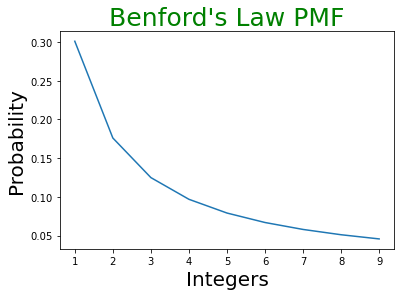

In [6]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(ns,Pbls)
ax.set_xlabel('Integers',size=20) # label x axis
ax.set_ylabel('Probability',size=20) # label y axis
ax.set_title("Benford's Law PMF",size=25,color='green') # label title

plt.show()

## <font color='red'>b) 4 pts</font>

Use the NumPy function sum to verify that the total probability of any leading integer is 1.

In [7]:
np.sum(Pbls)

0.9999999999999999

## <font color='red'>c) 8 pts</font>

Write a function that takes an input number, and returns the leading digit of the absolute value of that number. Use the equation below:

$n=FLOOR\left(\frac{\mid x\mid}{10^{FLOOR(\log_{10}x)}}\right)$

where $\mid x \mid$ is the absolute value of $x$ and $FLOOR(x)$ is $x$ rounded down (i.e., $FLOOR(346.8) = 3$ and $FLOOR(1.234)=1)$. Test out the function with several numbers, ranging from 0.01 to 10,000.

***Include a full copy of the function in the write-up.***

In [9]:
def leading_digit(x):
    numerator = np.abs(x) # absolute value
    denominator = 10**np.floor(np.log10(x)) # floor rounds down
    outer = np.floor(numerator/denominator)
    return outer

leading_digit(579) # testing leading_digit
leading_digit(0.01)
leading_digit(10000)

1.0

## <font color='red'>d) 10 pts</font>

For this problem, we will read in the data file *CountryPopulation.csv*, which contains a dataframe of population data from various contries. A dataframe is an array of data (like the arrays we created in part *a*), but come with additional metadata -- such as column headings and row headings. **Microsoft Excel** is an example of software that handles dataframes... so an Excel spreadsheet is just a type of dataframe!

In Python, it is a little bit more fiddly to read in a dataframe than **Matlab**, **Excel**, or other programs. However, Python allows a much greater depth of control when reading in data than other software, which can be particularly important in research pursuits where your data files may be in a non-standard or obscure format.

For this class, we could use **NumPy** to handle dataframes, but that can get a little clunky. Instead, we will work with a package called **Pandas**, which is built on top of **NumPy**, so it is streamlined and easy to use.

Open *CountryPopulation.csv* in the Jupyter server and take a look at it. *CountryPopulation.csv* contains lines of data that are seperated by commas and spaces, with headers at the top. 

To import this data into our Jupyter notebook as a variable, we need to use the **Pandas** function *read_table*, which takes several arguments. Let's look at more on this function *[here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html)*. Looking at the documentation of *read_table*, you can see that this function takes many arguments. However, in the documentation, many of them are already assigned (the ones that have an "=" sign are already defined). The ones that are already assigned like this are called *keyword arguments*, and you only need to change them if you are unsatisfied with the defaults, and you can change them in any order when you call the function. The arguments that do not have "=" signs in them are called *positional arguments*, and must be defined **in the same order as they appear in the documentation**. *read_table* only has one positional argument, which is the filepath to the data we want to read in.

Use the following code to read in the dataframe. The first argument here is the filepath (this only needs to be the file name if the file is stored in the same folder as this Jupyter notebook). The second tells *read_table* that the delimiter between separate data points. The third is a keyword argument that tells *read_table* to ignore spaces in between the values.

```python
import pandas as pd
data = pd.read_table("CountryPopulation.csv",sep=',',skipinitialspace=True)
```

Once you have read in the data, print it out with 

```python 
print(data)
```

You will see that there are two columns of data, under the headers 'country' and 'population' (in thousands). The numbers on the far left are called *indices* and refer to the positional placement of each line of data in the dataframe. In this lab, we only need the population data, so go ahead and save the population data to a numpy array via

```python
popdata = data['population']
```

Using what you know about how to use functions in python, answer the following questions:
1. What is the smallest population amongst these data?
2. What is the largest?
3. What is the mean of these population data?
4. What is the median?

Use your function from part (c) to find the leading digit of each country’s population. Make a histogram (matplotlib command *[hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)* of the leading digits.

In [10]:
import pandas as pd
data = pd.read_table("CountryPopulation.csv",sep=',',skipinitialspace=True)
print(data)

               country    population
0          Afghanistan  2.185145e+07
1              Albania  3.143047e+06
2              Algeria  3.030252e+07
3       American Samoa  6.762183e+04
4              Andorra  8.195528e+04
..                 ...           ...
226  Wallis and Futuna  1.446100e+04
227              Samoa  1.586319e+05
228              Yemen  1.834833e+07
229             Zambia  1.042103e+07
230           Zimbabwe  1.260746e+07

[231 rows x 2 columns]


In [11]:
popdata = data['population'] * 1000
np.min(popdata) # smallest population amongst these data
np.max(popdata)  # largest population amongst these data
np.mean(popdata) # mean population amongst these data
np.median(popdata) # median population amongst these data 

4409269309.823

The smallest population amongst these data is 7770.609 
The largest population amongst these data is 1253670940268.538 
The mean population amongst these data is 26217844138.58546 
The median population amongst these data is 4409269309.823 

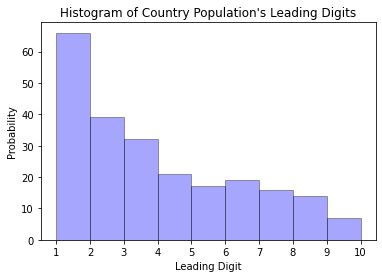

In [24]:
digits = leading_digit(popdata) 

plt.hist(digits, bins=[1,2,3,4,5,6,7,8,9,10],
         histtype='bar',
         facecolor='blue',
         edgecolor='black',
         alpha=0.35)

plt.xlabel('Leading Digit')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.ylabel('Probability')
plt.title("Histogram of Country Population's Leading Digits")

plt.show()

## <font color='red'>e) 10 pts</font>

Use the **np.histogram** function (google for the documentation!) to compute the number of times each digit appears in the list from part
(d). Divide these numbers by the total number of leading digits, thereby obtaining frequency. Plot these calculated
frequencies on the same plot as the frequencies predicted by Benford’s PMF. Use legend to add plot legends. Follow the below example format:

```python
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111) # The (111) here will be discussed in later labs; just include it for now.
ax.plot(x,y,label='ye olde label 1')
ax.plot(x,y2,label='ye olde label 2')
plt.legend(loc=0) # loc=0 means that the legend will be placed where matplotlib detects the fewest lines.
```

What is the median leading digit? Is this what you would expect? Why or why not? Would you expect the same result if you did this same test over a random distribution of numbers between 1 and 10? Why or why not?

In [25]:
counts,integers = np.histogram(digits,bins=[1,2,3,4,5,6,7,8,9,10])
total = np.sum(counts)
freq = counts/total

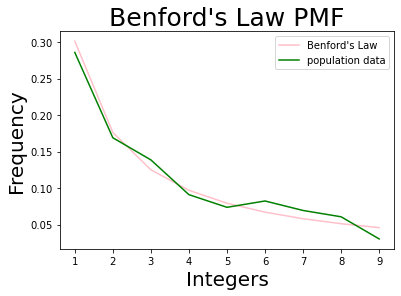

In [28]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(ns,Pbls,label="Benford's Law",color='pink')
ax.plot(ns,freq,label='population data',color='green')

ax.set_xlabel('Integers',size=20) # label x axis
ax.set_ylabel('Frequency',size=20) # label y axis
ax.set_title("Benford's Law PMF",size=25,color='black') # label title

plt.legend()
plt.show()

In [31]:
np.median(digits) # median leading digit

3.0

The median leading digit is 3. This is what you'd expect because, according to Benford's Law, a large set of naturally produced numbers will not have an even distribution of leading digits, in fact the earlier digits will have a much higher probability of being the leading digit than the later digits (see the plot). Due to this skew, we'd expect somewhere around 3 to be the actual median, instead of 5. I wouldn't expect the same result if I did this same test over a random distribution of 1 and 10 because then I would expect 5 to be the median, since it's a randomly distributed set of numbers 1-10.